#### Statistical Analysis

In [1564]:
# statistical analysis

#### Step 1. Data Preprocessing & Cleaning
✔ Load the dataset\
✔ Identify and handle missing values (true missing vs. "NA" meaning absence)\
✔ Convert incorrect data types (e.g., numeric features stored as objects)\
✔ Handle outliers and anomalies

In [1565]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

train = pd.read_csv("home-data-for-ml-course\\train.csv")
test = pd.read_csv("home-data-for-ml-course\\test.csv")
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

THERE ARE MISSING VALUES IN OUR DATA

In [1566]:
# Afficher les valeurs des colonnes MasVnrType et MasVnrArea pour les lignes 235 et 236
train.loc[[233, 234], ['MasVnrType', 'MasVnrArea']]


,MasVnrType,MasVnrArea
233,None,0
234,NA,NA


In [1567]:
#save the id
train_ID = train["Id"]
test_ID = test["Id"]

#drop ID duuuh..
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

train[["LotFrontage", "MasVnrArea", "GarageYrBlt"]] = train[["LotFrontage", "MasVnrArea", "GarageYrBlt"]].apply(pd.to_numeric, errors="coerce")

#group features for preprocessing purpose.
train_categorical = [feature for feature in train.columns if train[feature].dtype == "object"] 

train_nominal = ["MSZoning", "Street", "Alley", "LandContour", "LotConfig", "Neighborhood", "Condition1", "Condition2", 
                    "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
                    "CentralAir", 'Electrical',"GarageType", "MiscFeature", "SaleType", "SaleCondition"]

train_ordinal = [ 'LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                    'BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
                    'GarageCond','PavedDrive','PoolQC','Fence']

train_numerical = [feature for feature in train.columns if feature not in train_categorical + ['SalePrice']]

discrete_numerical_train = [ 'OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath',
  'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold', "MSSubClass"] 

continuous_numerical_train = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                                  'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt',
                                  'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                                  'MiscVal','YrSold','SalePrice']
train_numerical_df=train[train_numerical]
train_categorical_df=train[train_categorical]
continuous_numerical_train_df=train[continuous_numerical_train]
discrete_numerical_train_df=train[discrete_numerical_train ]
train_nominal_df=train[train_nominal]
train_ordinal_df=train[train_ordinal]

# statistics
print(train.isnull().sum().sum())
print(train_numerical_df.isnull().sum().sum())
print(train_categorical_df.isnull().sum().sum())




348
348
0


In [1568]:
# Count the number of features (columns) for each type
print(f"Number of numerical features: {train_numerical_df.shape[1]}")
print(f"Number of categorical features: {train_categorical_df.shape[1]}")
print(f"Number of continuous numerical features: {continuous_numerical_train_df.shape[1]}")
print(f"Number of discrete numerical features: {discrete_numerical_train_df.shape[1]}")
print(f"Number of nominal features: {train_nominal_df.shape[1]}")
print(f"Number of ordinal features: {train_ordinal_df.shape[1]}")


Number of numerical features: 36
Number of categorical features: 43
Number of continuous numerical features: 24
Number of discrete numerical features: 13
Number of nominal features: 23
Number of ordinal features: 20


### Data Cleaning

##### Handeling Missing Values

NA is not a valid value for numerical features, but for some categorical features, it is a legitimate category (distinct from an absent value). We've identified where 'NA' is a valid value and where it is not, to handle absent values appropriately.

Categorical features

In [ ]:
from sklearn.impute import SimpleImputer

# Nominal features where NA can be a valid value
valid_na_nominal_features = ["Alley", "GarageType", "MiscFeature"]

# Ordinal features where NA can be a valid value
valid_na_ordinal_features = [
    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
    "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence"
]

# Combine the valid NA lists
valid_categorical_na_features = valid_na_nominal_features + valid_na_ordinal_features

# Select columns that are not in the valid_categorical_na_features list
columns_to_impute = [col for col in train_categorical_df.columns if col not in valid_categorical_na_features]


print(train_categorical_df[columns_to_impute].eq("NA").sum().sum())

imputer = SimpleImputer(strategy='most_frequent')


train_categorical_df[columns_to_impute] = imputer.fit_transform(train_categorical_df[columns_to_impute])
print(train_categorical_df[columns_to_impute].isnull().sum().sum())


0
0


C:\Users\User\AppData\Local\Temp\ipykernel_5444\3493818026.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Numerical Features

In [1570]:
print(train_numerical_df.isnull().sum().sum())
print(train_numerical_df.loc[[233, 234],['MasVnrArea']])
train_numerical_df_cols=train_numerical_df.columns
imputer = SimpleImputer(strategy='mean')
train_numerical_df = pd.DataFrame(imputer.fit_transform(train_numerical_df))
train_numerical_df.columns=train_numerical_df_cols
print(train_numerical_df.loc[[233, 234],['MasVnrArea']])
print(train_numerical_df.isnull().sum().sum())



348
     MasVnrArea
233         0.0
234         NaN
     MasVnrArea
233    0.000000
234  103.685262
0


##### Encoding Features 

 Encoding Ordinal Features

In [1571]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Create an OrdinalEncoder instance
ordinal_encoder = OrdinalEncoder()

# Apply Ordinal Encoding to the specified columns
train_ordinal_df_encoded = ordinal_encoder.fit_transform(train_ordinal_df)

# Convert the encoded values to a DataFrame and keep the original column names
train_ordinal_df_encoded = pd.DataFrame(train_ordinal_df_encoded, columns=train_ordinal_df.columns)

# Show the encoded DataFrame
train_ordinal_df_encoded.head()




,LotShape,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,3.0,0.0,0.0,2.0,4.0,2.0,4.0,4.0,2.0,6.0,0.0,2.0,6.0,3.0,2.0,5.0,5.0,2.0,3.0,4.0
1,3.0,0.0,0.0,3.0,4.0,2.0,4.0,1.0,0.0,6.0,0.0,3.0,6.0,5.0,2.0,5.0,5.0,2.0,3.0,4.0
2,0.0,0.0,0.0,2.0,4.0,2.0,4.0,2.0,2.0,6.0,0.0,2.0,6.0,5.0,2.0,5.0,5.0,2.0,3.0,4.0
3,0.0,0.0,0.0,3.0,4.0,4.0,1.0,4.0,0.0,6.0,2.0,2.0,6.0,2.0,3.0,5.0,5.0,2.0,3.0,4.0
4,0.0,0.0,0.0,2.0,4.0,2.0,4.0,0.0,2.0,6.0,0.0,2.0,6.0,5.0,2.0,5.0,5.0,2.0,3.0,4.0


In [1572]:
# Create an empty list to hold the results
encoded_values_list = []

# Loop through each feature in the ordinal columns
for col in train_ordinal_df.columns:
    # Fit and transform the feature
    ordinal_encoder.fit(train_ordinal_df[[col]])
    
    # Retrieve the original categories and corresponding encoded values
    original_categories = ordinal_encoder.categories_[0]
    encoded_values = list(range(len(original_categories)))
    
    # Append to the list as a dictionary
    encoded_values_list.append({
        "Feature": col,
        "Possible Values": ", ".join(original_categories),
        "Encoded Values": ", ".join(map(str, encoded_values))
    })

# Convert the list to a DataFrame
encoded_values_df = pd.DataFrame(encoded_values_list)

# Display the DataFrame
encoded_values_df


,Feature,Possible Values,Encoded Values
0,LotShape,"IR1 , IR2 , IR3 , Reg","0, 1, 2, 3"
1,Utilities,"AllPub , NoSeWa","0, 1"
2,LandSlope,"Gtl , Mod , Sev","0, 1, 2"
3,ExterQual,"Ex , Fa , Gd , TA","0, 1, 2, 3"
4,ExterCond,"Ex , Fa , Gd , Po ...","0, 1, 2, 3, 4"
5,BsmtQual,"Ex , Fa , Gd , NA , TA...","0, 1, 2, 3, 4"
6,BsmtCond,"Fa , Gd , NA , Po , TA...","0, 1, 2, 3, 4"
7,BsmtExposure,"Av , Gd , Mn , N...","0, 1, 2, 3, 4"
8,BsmtFinType1,"ALQ , BLQ , GLQ , L...","0, 1, 2, 3, 4, 5, 6"
9,BsmtFinType2,"ALQ , BLQ , GLQ , L...","0, 1, 2, 3, 4, 5, 6"


Encoding Nominal Features

In [1573]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply Label Encoding to the specified nominal columns
train_nominal_df_encoded = train_nominal_df.apply(label_encoder.fit_transform)

# Display the encoded DataFrame
train_nominal_df_encoded.head()


,MSZoning,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,4,5,2,2,0,5,...,13,1,2,1,1,5,1,1,8,4
1,3,1,1,3,2,24,1,2,0,2,...,8,3,1,1,1,5,1,1,8,4
2,3,1,1,3,4,5,2,2,0,5,...,13,1,2,1,1,5,1,1,8,4
3,3,1,1,3,0,6,2,2,0,5,...,15,3,0,1,1,5,5,1,8,0
4,3,1,1,3,2,15,2,2,0,5,...,13,1,2,1,1,5,1,1,8,4


In [1574]:
# Create an empty list to hold the results
encoded_values_list_nominal = []

# Loop through each feature in the nominal columns
for col in train_nominal_df.columns:
    # Fit and transform the feature
    label_encoder.fit(train_nominal_df[col])
    
    # Retrieve the original categories and corresponding encoded values
    original_categories = label_encoder.classes_
    encoded_values = list(range(len(original_categories)))
    
    # Append to the list as a dictionary
    encoded_values_list_nominal.append({
        "Feature": col,
        "Possible Values": ", ".join(original_categories),
        "Encoded Values": ", ".join(map(str, encoded_values))
    })

# Convert the list to a DataFrame
encoded_values_df_nominal = pd.DataFrame(encoded_values_list_nominal)

# Display the DataFrame
encoded_values_df_nominal


,Feature,Possible Values,Encoded Values
0,MSZoning,"C (all) , FV , RH , RL , RM...","0, 1, 2, 3, 4"
1,Street,"Grvl , Pave","0, 1"
2,Alley,"Grvl , NA , Pave","0, 1, 2"
3,LandContour,"Bnk , HLS , Low , Lvl ...","0, 1, 2, 3"
4,LotConfig,"Corner , CulDSac , FR2 , FR3 ...","0, 1, 2, 3, 4"
5,Neighborhood,"Blmngtn , Blueste , BrDale , B...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ..."
6,Condition1,"Artery , Feedr , Norm , PosA ...","0, 1, 2, 3, 4, 5, 6, 7, 8"
7,Condition2,"Artery , Feedr , Norm , PosA ...","0, 1, 2, 3, 4, 5, 6, 7"
8,BldgType,"1Fam , 2fmCon , Duplex , Twnhs , Tw...","0, 1, 2, 3, 4"
9,HouseStyle,"1.5Fin , 1.5Unf , 1Story , 2.5Fin ...","0, 1, 2, 3, 4, 5, 6, 7"


Replacing the NA values with 0 for the Numerical features

In [1575]:
# print(train_numerical_df.isnull().sum())
# # Identify numerical columns
# numerical_columns = train_numerical_df.select_dtypes(include=['number']).columns

# # Check for columns that have missing values (NA)
# missing_na_columns = train_numerical_df[numerical_columns].isnull().any()

# # Get the list of numerical features that have missing values
# missing_na_features = missing_na_columns[missing_na_columns].index.tolist()

# # Print the list of numerical features with missing values
# print("Numerical features with missing values (NA):")
# print(missing_na_features)



In [1576]:
# print(train_numerical_df.dtypes.unique())
# # Replace all NA values with 0 in the DataFrame
# train_numerical_df = train_numerical_df.fillna(0)

# # Check if the replacement was successful by counting missing values again
# print(train_numerical_df.isnull().sum())


#### Step 2.Exploratory Data Analysis (EDA)
✔ Visualize target variable (SalePrice)\
Identify correlations between features and SalePrice\
Analyze categorical vs. numerical features\
Detect and handle outliers\

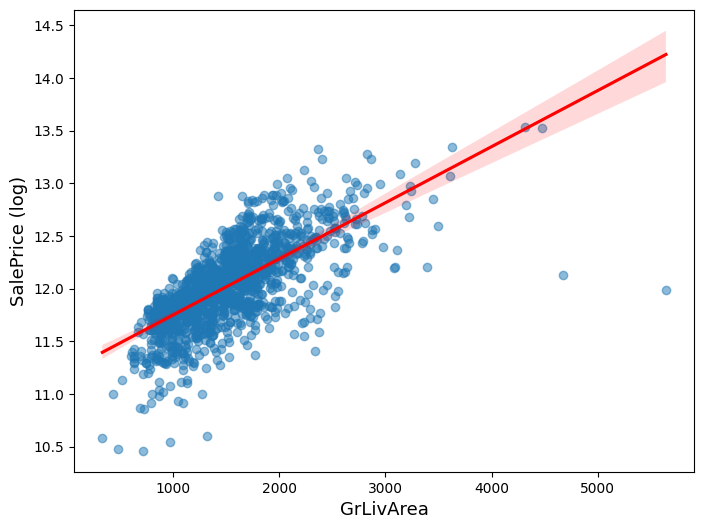

In [1577]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Scatter plot with regression line
sns.regplot(x=train['GrLivArea'], 
            y=np.log(train['SalePrice']), 
            ax=ax, 
            scatter_kws={'alpha': 0.5},  # Adjust transparency of points
            line_kws={'color': 'red'})  # Set line color

# Labels
ax.set_xlabel("GrLivArea", fontsize=13)
ax.set_ylabel("SalePrice (log)", fontsize=13)

# Show the plot
plt.show()

#box plot, check it its used for geting outliers.

##### Handeling outliers
dropped visually appearing outliers

In [1578]:

train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<250000)].index)

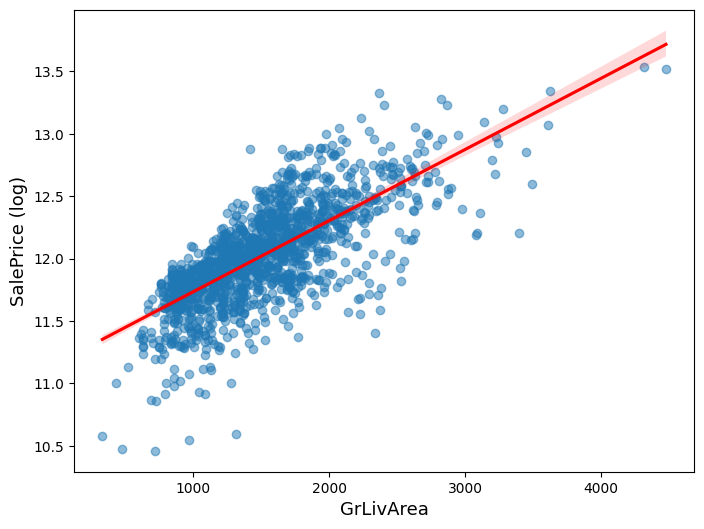

In [1579]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Scatter plot with regression line
sns.regplot(x=train['GrLivArea'], 
            y=np.log(train['SalePrice']), 
            ax=ax, 
            scatter_kws={'alpha': 0.5},  # Adjust transparency of points
            line_kws={'color': 'red'})  # Set line color

# Labels
ax.set_xlabel("GrLivArea", fontsize=13)
ax.set_ylabel("SalePrice (log)", fontsize=13)

# Show the plot
plt.show()

#box plot, check it its used for geting outliers.

##### Plotting the relationship between the different numerical values and the SalePrice


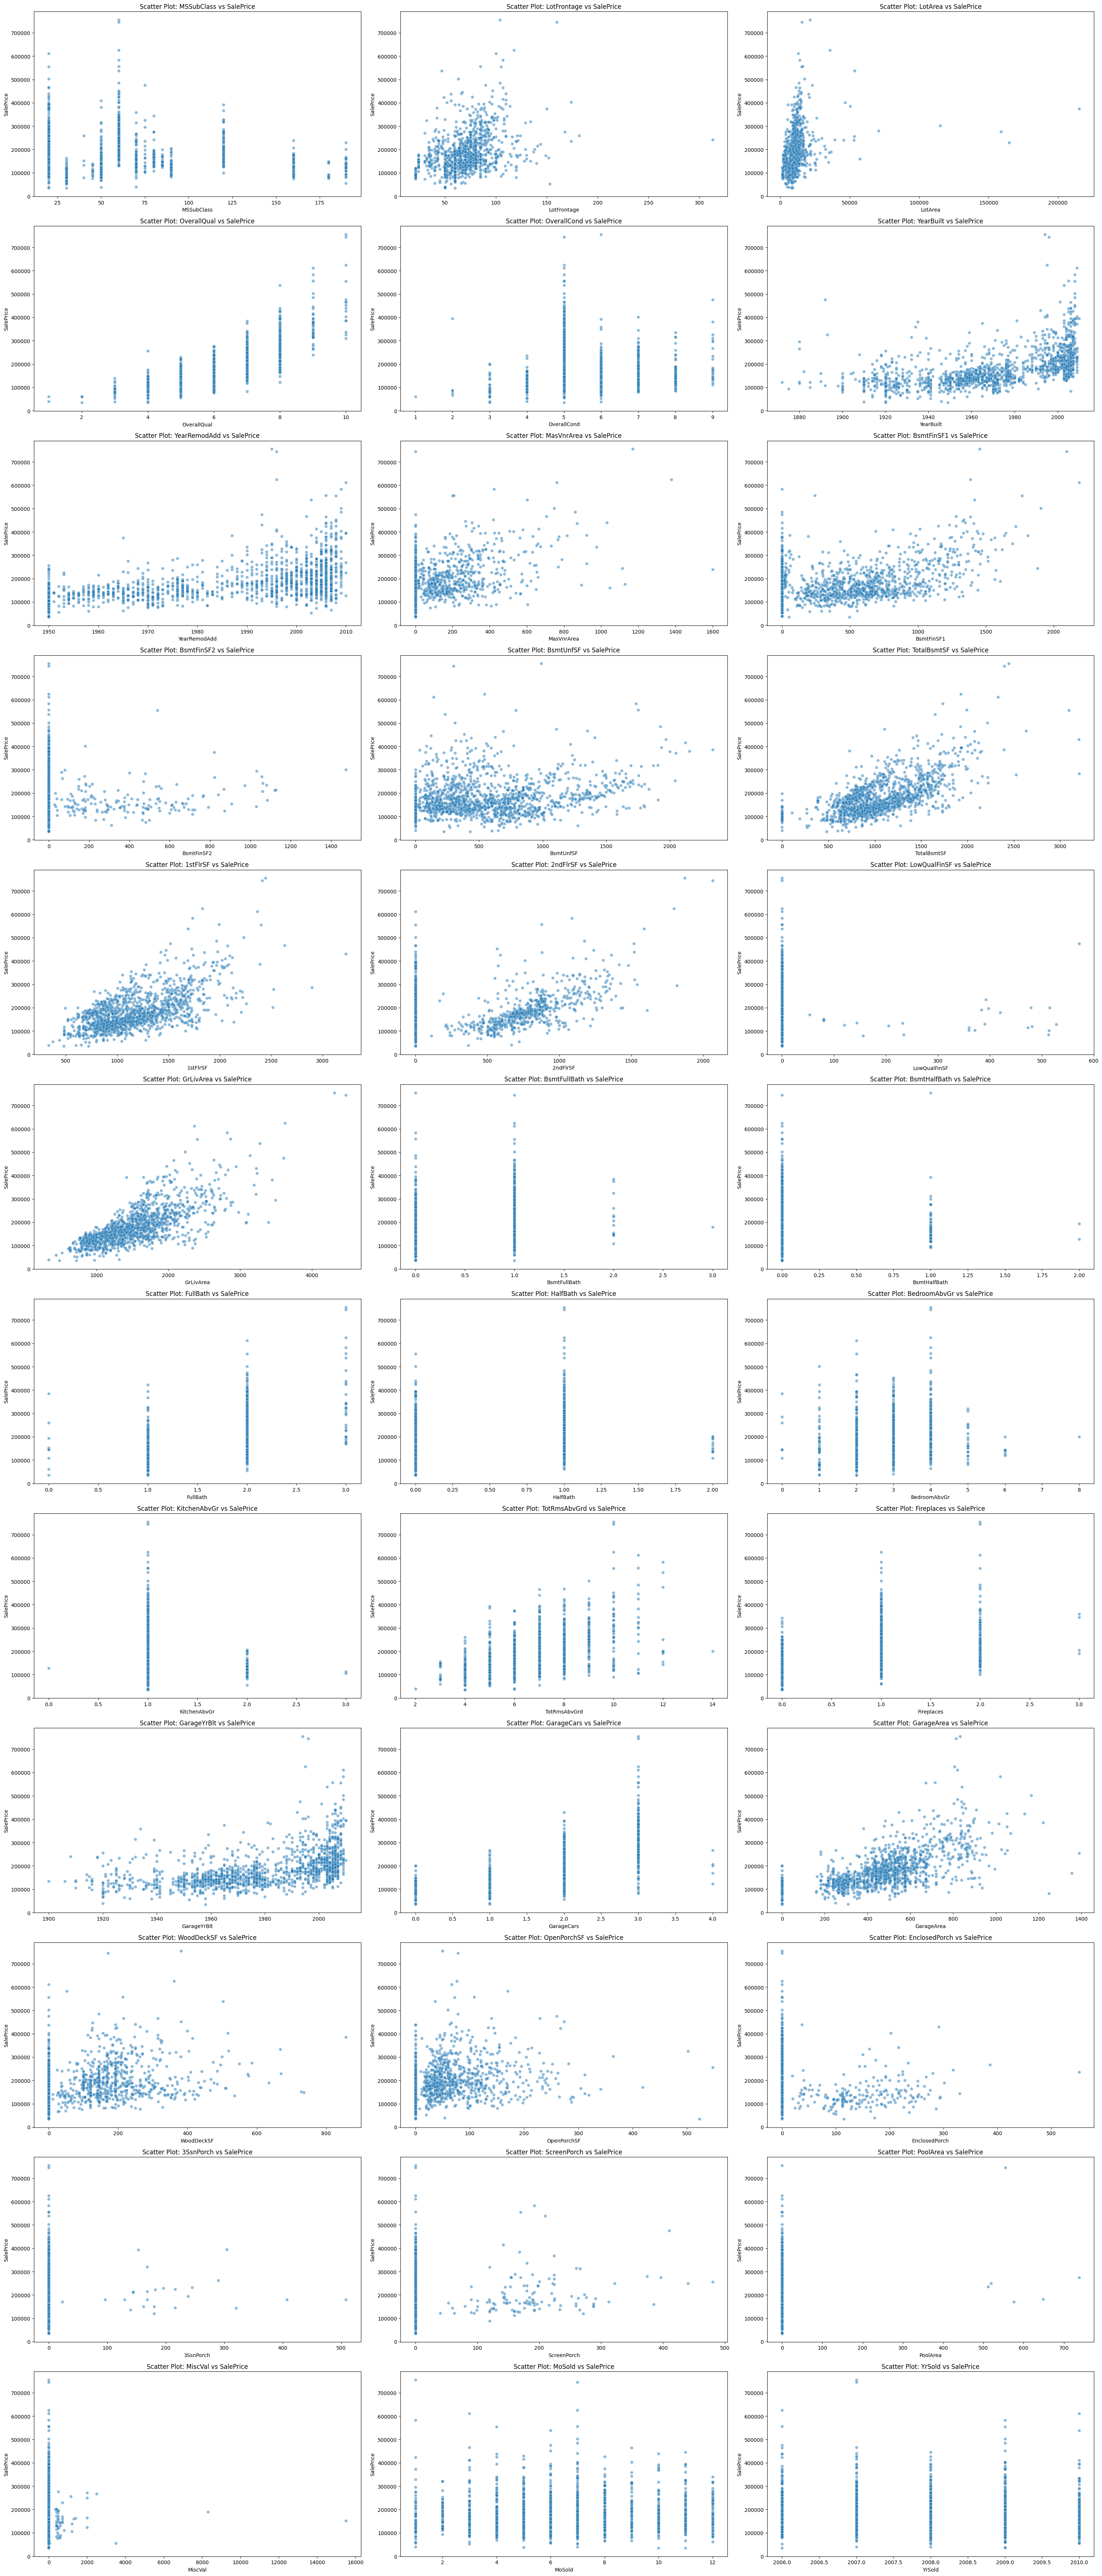

In [1580]:
# Create subplots with larger figure size
fig, ax = plt.subplots(12, 3, figsize=(30, 70))

# Loop through each numerical feature
for var, subplot in zip(train_numerical, ax.flatten()):
    sns.scatterplot(x=train[var], y=train['SalePrice'], ax=subplot, alpha=0.5)
    subplot.set_title(f"Scatter Plot: {var} vs SalePrice", fontsize=12)

# Tighten layout
plt.tight_layout()

plt.show()


***Visualized the correlation between our target value [SalePrice] and all of our numerical features.***
- helps us understand our data better.
- show which features contributes more to the target value.
- show which features have the smallest effect incase we want to drop them.

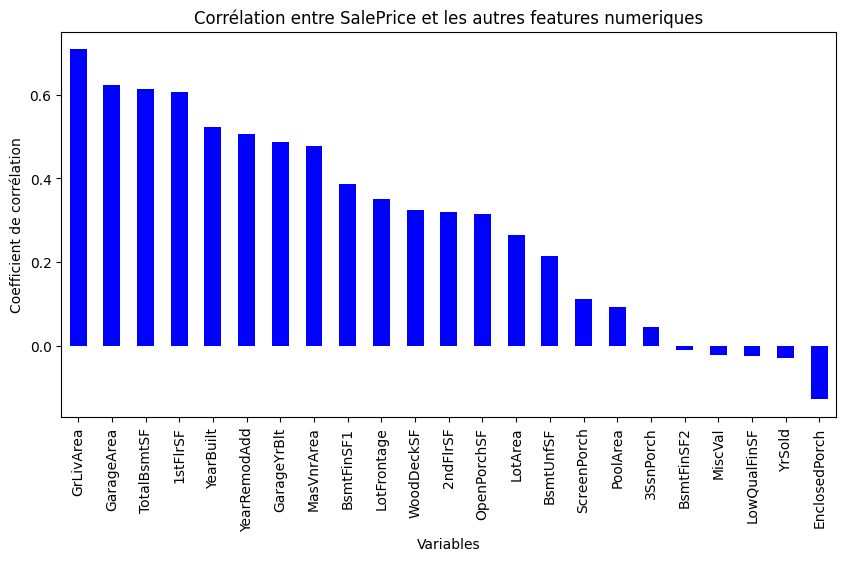

In [1581]:
#train_numerical.corr()
train_numerical = train[[feature for feature in train.columns if feature not in train_categorical]]

corr = continuous_numerical_train_df.corr()['SalePrice'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
corr[1:].plot(kind='bar', color='b')  # Exclut SalePrice (qui a une corrélation de 1 avec lui-même)
plt.title("Corrélation entre SalePrice et les autres features numeriques")
plt.ylabel("Coefficient de corrélation")
plt.xlabel("Variables")
plt.show()

##### Calculating **Correlation** and **Mutuel Information**
- using correlation matrix to detect redundency in features.
- drop, or merge the features with high correlation.
- When two features have high correlation, they carry similar information. This can lead to:
- ***Redundant features*** → Makes the model more complex without adding value.
- ***Multicollinearity*** → Some models (like Linear Regression) perform poorly when features are strongly correlated.

##### What to do?
- If two features are highly correlated (above 0.8-0.9), we usually remove one.
- If they have a meaningful relationship, we can combine them into a new feature (e.g., **"TotalSF"** = **"1stFlrSF"** + **"2ndFlrSF"** + **"TotalBsmtSF"**).\
***correlation measure only linear relationships between features***

so we will calculate ***Mutuel Information*** aswell to describe the relationship between our features
- ***MI*** measures how much information one feature provides about another
- If ***MI*** is high, the feature is useful for predicting the target (SalePrice).
- If ***MI*** is low, the feature doesn’t contribute much information.

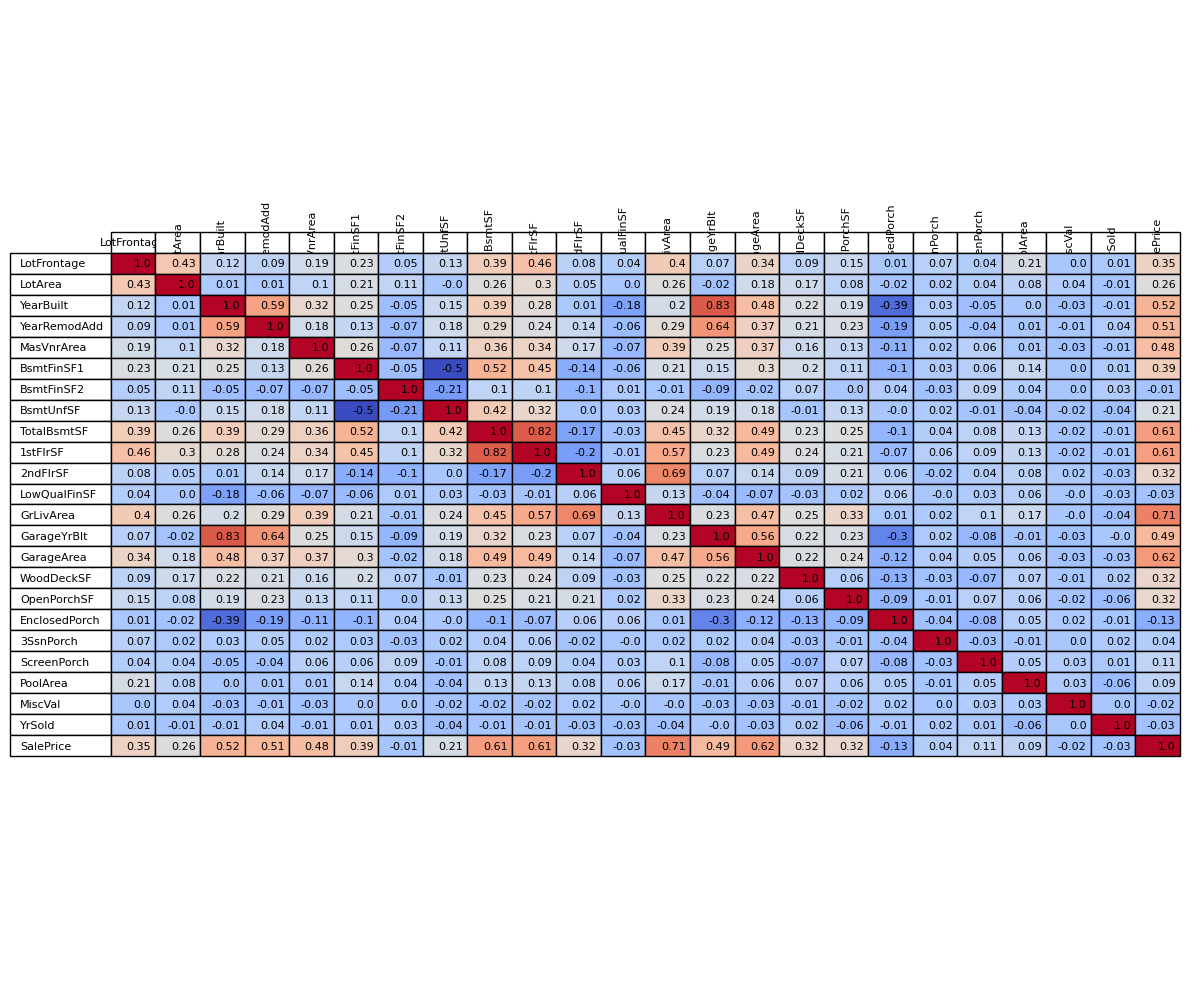

In [1582]:
corr_matrix = continuous_numerical_train_df.corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Normalize correlation values to a range of 0-1 for color mapping
normalized_corr = (corr_matrix - corr_matrix.min().min()) / (corr_matrix.max().max() - corr_matrix.min().min())

# Define a colormap (using "coolwarm")
cmap = plt.cm.coolwarm

# Add a table with the correlation matrix
table = ax.table(cellText=corr_matrix.round(2).values,
                 rowLabels=corr_matrix.index,
                 colLabels=corr_matrix.columns,
                 cellColours=cmap(normalized_corr.fillna(0).values),  # Fill NaNs to prevent errors
                 loc='center')

# Adjust table font size
table.auto_set_font_size(False)
table.set_fontsize(8)  # Reduce font size for better clarity

# Rotate the column labels to be vertical
for (i, j), cell in table.get_celld().items():
    if j == 0:  # First column (row labels) remain horizontal
        cell.set_text_props(rotation=0)
    else:  # Rotate the first row (column labels)
        if i == 0:
            cell.set_text_props(rotation=90)  # Rotate column labels 90 degrees
        else:
            cell.set_text_props(rotation=0)

# Hide axes
ax.axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [1583]:
threshold=0.8
high_corr_pairs = []

for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        # Check for high correlation and make sure not to check the diagonal (col1 != col2)
        if abs(corr_matrix.loc[col1, col2]) > threshold and col1 != col2:
            # Ensure each pair is stored only once by ordering the pair
            pair = tuple(sorted([col1, col2]))
            high_corr_pairs.append((pair[0], pair[1], corr_matrix.loc[col1, col2]))

# Remove duplicates by converting to a set and back to a list
unique_corr_pairs = list(set(high_corr_pairs))

# Convert the high_corr_pairs into a DataFrame for better readability
corr_pairs_df = pd.DataFrame(unique_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])

# Display the correlated pairs
print(corr_pairs_df)

# Now you can manually decide which feature to remove based on the correlation value



     Feature 1    Feature 2  Correlation
0  GarageYrBlt    YearBuilt     0.825667
1     1stFlrSF  TotalBsmtSF     0.819530


In [1584]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
y = train.SalePrice
numerical_features = train.select_dtypes(include=["int64", "float64"]).columns.drop("SalePrice", errors="ignore")
mutual_df = train[numerical_features]


mutual_info = mutual_info_regression(mutual_df.fillna(0), y, random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
# pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"] ).style.background_gradient("cool")
pd.DataFrame(mutual_info.sort_values(ascending=False), columns=["Mutual Information"]).style.background_gradient("coolwarm", axis=0)

,Mutual Information
OverallQual,0.574817
GrLivArea,0.484534
TotalBsmtSF,0.370944
GarageCars,0.367556
GarageArea,0.366143
YearBuilt,0.363164
1stFlrSF,0.314310
MSSubClass,0.279657
FullBath,0.262958
GarageYrBlt,0.256851


In [1585]:
mutual_df_categorical = train[train_categorical]
#categorical features must be encoded to get mutual information
for colname in mutual_df_categorical:
    mutual_df_categorical[colname], _ = mutual_df_categorical[colname].factorize()
mutual_info = mutual_info_regression(mutual_df_categorical.fillna("Do_not_have_feature"), y, random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df_categorical.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Categorical_Feature_MI"] ).style.background_gradient("cool")

C:\Users\User\AppData\Local\Temp\ipykernel_5444\764515689.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_5444\764515689.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_5444\764515689.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Categorical_Feature_MI
Neighborhood,0.501277
ExterQual,0.329996
BsmtQual,0.324826
KitchenQual,0.322202
GarageFinish,0.261661
GarageType,0.204982
FireplaceQu,0.202038
Foundation,0.197618
HeatingQC,0.169360
Exterior2nd,0.155711
